# GDP vs Life Expectancy

This project will investigate if there is a relationship between GDP and life expectancy of six countries.

This project will look at:

- If GDP has increased over time for the six countries.
- If life expectancy has increased over time for the six countries.
- The relationship between GDP and life expectancy.
- The average life expectancy and GDP for each country.

Data Sources:
- [GDP source](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)
- [Life expectancy source](https://apps.who.int/gho/data/node.main.688)

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Cedric\Downloads\Life-Expectancy-and-GDP\Life-Expectancy-and-GDP\all_data.csv")

In [4]:
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


### The countries and the years represented in the data:

In [5]:
print(df.Country.unique())
print(df.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [6]:
df = df.rename({'Life expectancy at birth (years)': 'LE'}, axis = 'columns')
df.head()

,Country,Year,LE,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Distribution of GDP and life expectancy

The GDP is right skewed as life expectancy is left skewed.

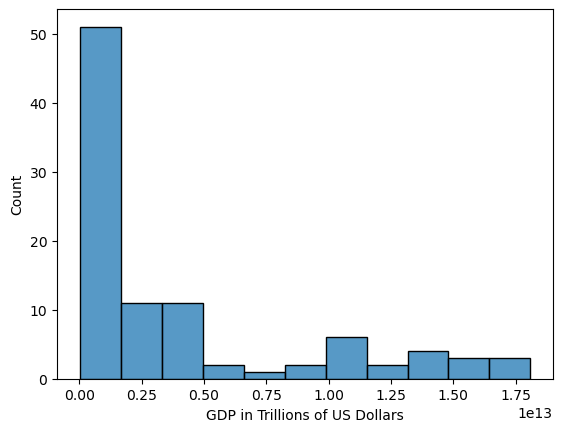

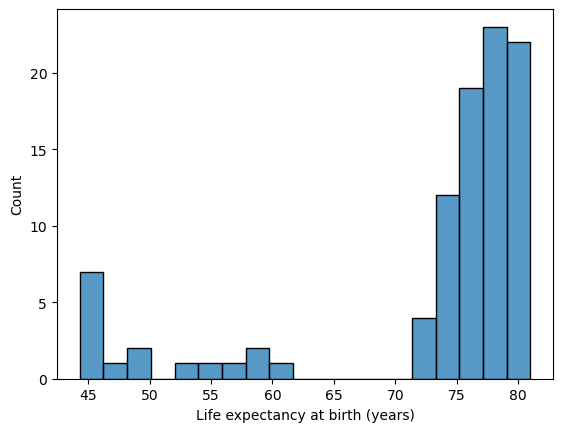

In [7]:
sns.histplot(df.GDP)
plt.xlabel("GDP in Trillions of US Dollars")
plt.show()


sns.histplot(df.LE)
plt.xlabel("Life expectancy at birth (years)")
plt.show()


##  GDP over time 

The graphs below show the GDP for each country over 15 years with each country showing an increase.

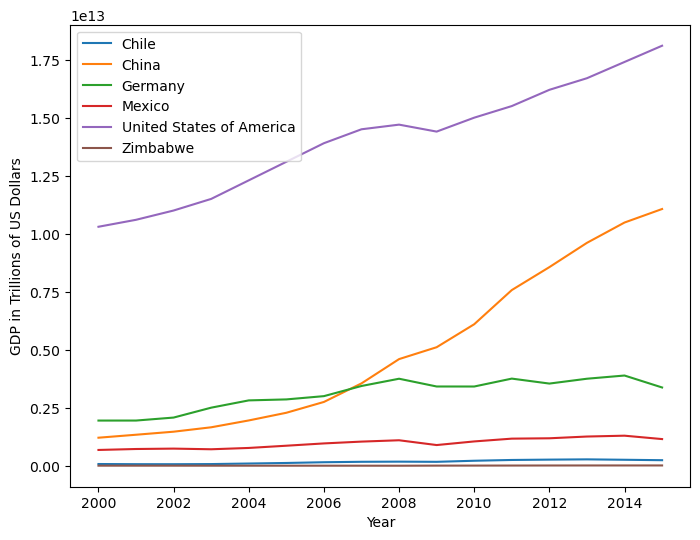

In [8]:
plt.figure(figsize = (8, 6))
sns.lineplot(x = df.Year, y = df.GDP, hue = df.Country)
plt.xlabel("Year")
plt.ylabel("GDP in Trillions of US Dollars")
plt.legend(loc = 'best')
plt.show()

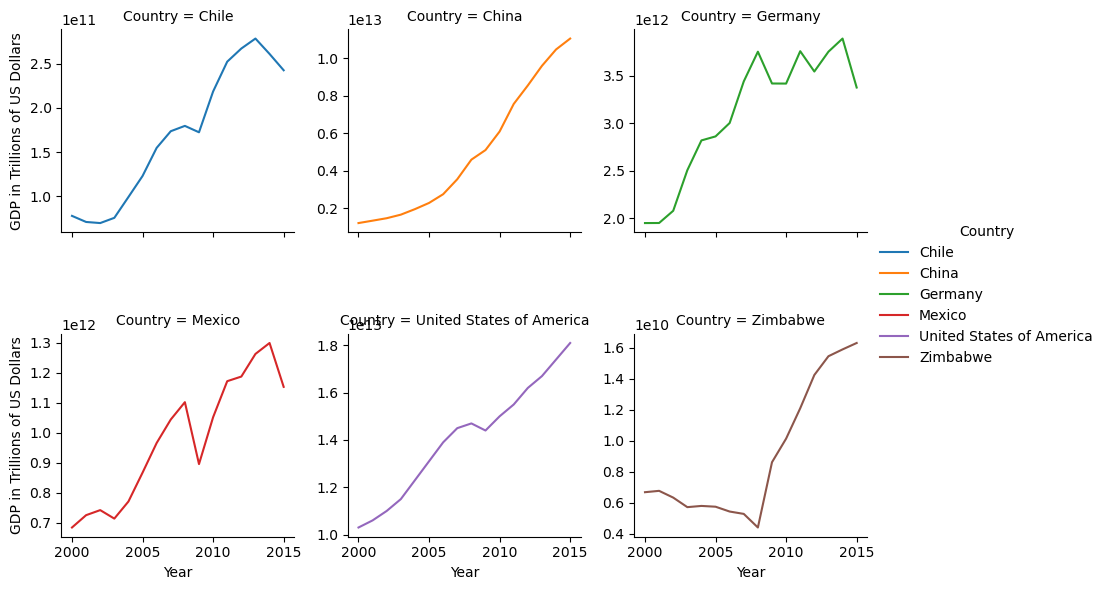

In [9]:
gGDP = sns.FacetGrid(df, col='Country', col_wrap = 3, hue = 'Country', sharey = False) 
gGDP.map(sns.lineplot,'Year','GDP') 
gGDP.add_legend() 
gGDP.set_axis_labels("Year","GDP in Trillions of US Dollars")
plt.subplots_adjust(hspace = .5)
gGDP;

## Life expectancy over time

The graphs below show how life expectancy has changed over 15 years. Each country showing an increase. Zimbabwe taking a bit of a dip before increasing after 2004. 

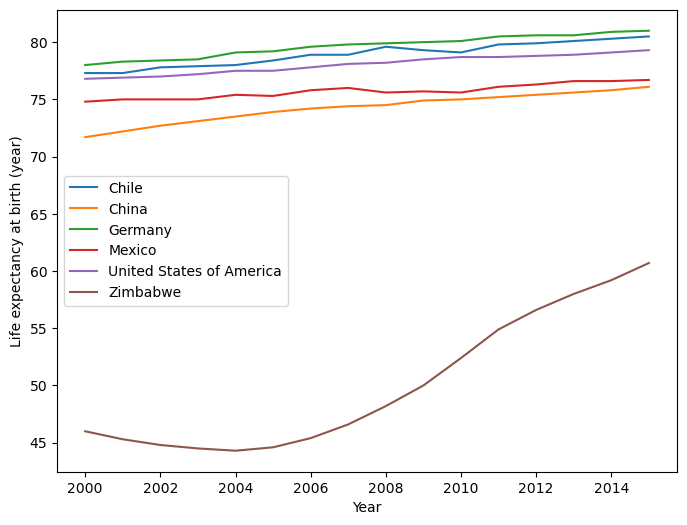

In [10]:
plt.figure(figsize = (8, 6))
sns.lineplot(x = df.Year, y = df.LE, hue = df.Country)
plt.xlabel("Year")
plt.ylabel("Life expectancy at birth (year)")
plt.legend(loc = 'best')
plt.show()

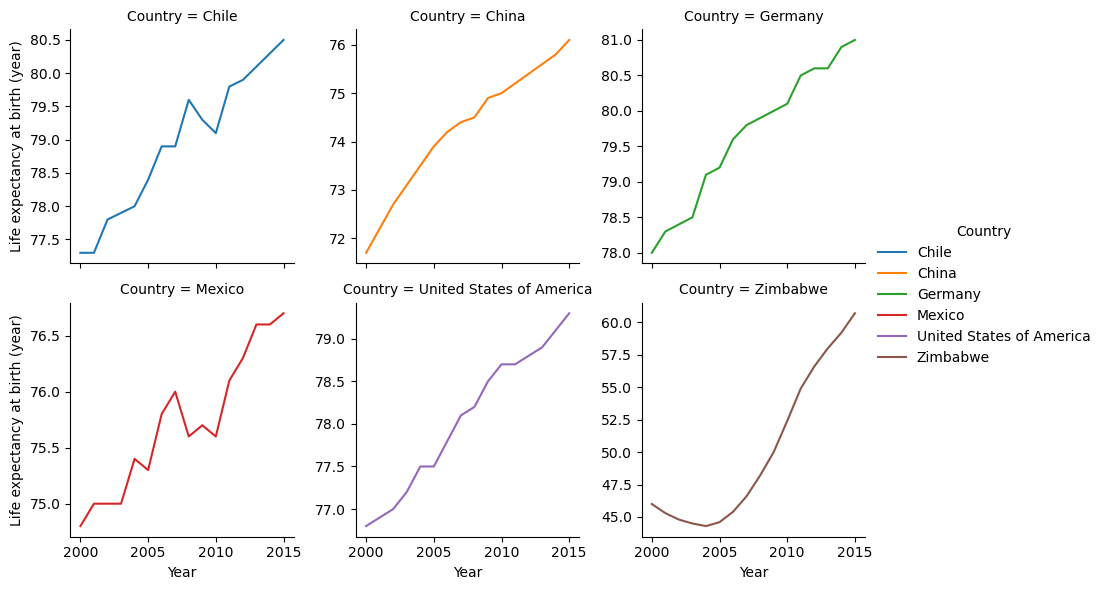

In [11]:
gLE = sns.FacetGrid(df, col='Country', col_wrap = 3, hue = 'Country', sharey = False) 
gLE.map(sns.lineplot,'Year','LE') 
gLE.add_legend() 
gLE.set_axis_labels("Year","Life expectancy at birth (year)") 
gLE;

In [12]:
dfmean = df.drop('Year', axis = 1).groupby('Country').mean().reset_index()
print(dfmean)

                    Country        LE           GDP
0                     Chile  78.94375  1.697888e+11
1                     China  74.26250  4.957714e+12
2                   Germany  79.65625  3.094776e+12
3                    Mexico  75.71875  9.766506e+11
4  United States of America  78.06250  1.407500e+13
5                  Zimbabwe  50.09375  9.062580e+09


## Average GDP per country

The USA with the highest GDP average and Zimbabwe with the lowest.

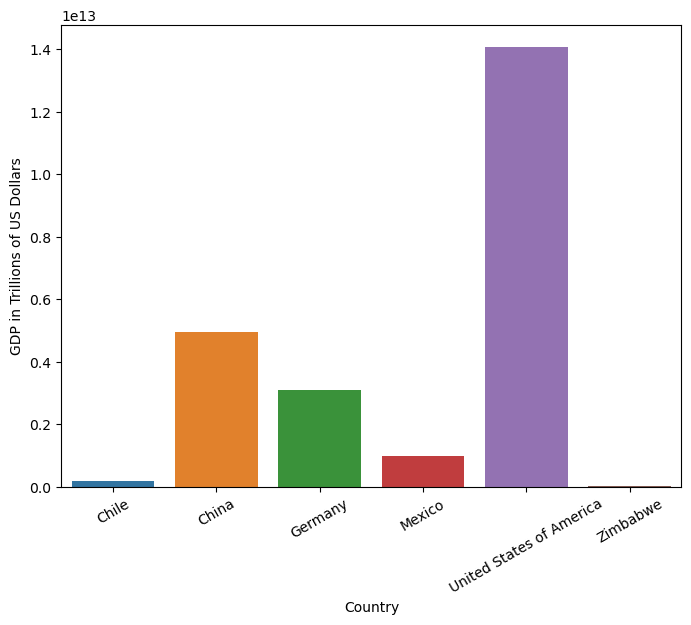

In [13]:
plt.figure(figsize = (8, 6))
sns.barplot(x = dfmean.Country, y = dfmean.GDP)
plt.ylabel("GDP in Trillions of US Dollars")
plt.xticks(rotation=30)
plt.show()

## Average life expectancy per country

Germany with the hightest life expectancy and Zimbabwe with the lowest.

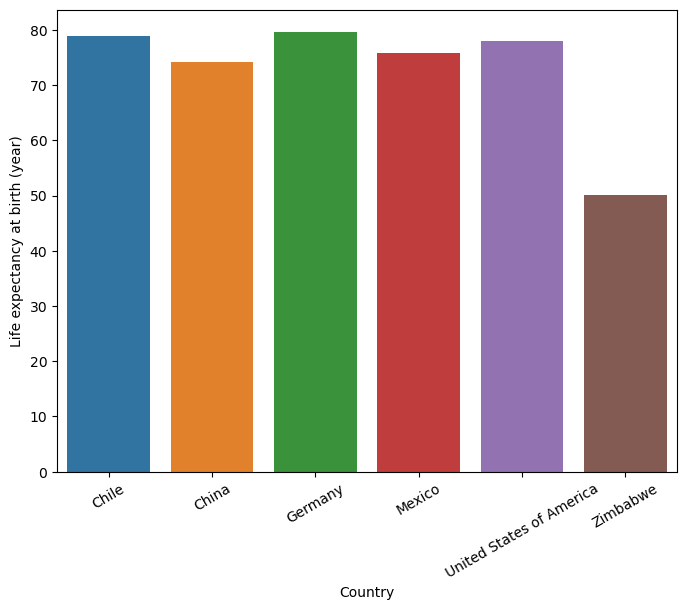

In [14]:
plt.figure(figsize = (8, 6))
sns.barplot(x = dfmean.Country, y = dfmean.LE)
plt.ylabel("Life expectancy at birth (year)")
plt.xticks(rotation=30)
plt.show()

## GDP vs life expectancy

There is a positive correlation between GDP and life expectancy with these six countries.

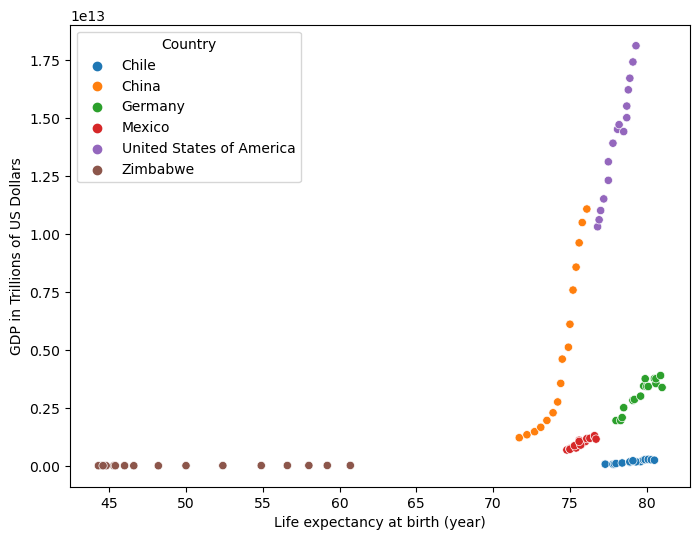

In [15]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = df.LE, y = df.GDP, hue = df.Country)
plt.xlabel("Life expectancy at birth (year)")
plt.ylabel("GDP in Trillions of US Dollars")
plt.show()

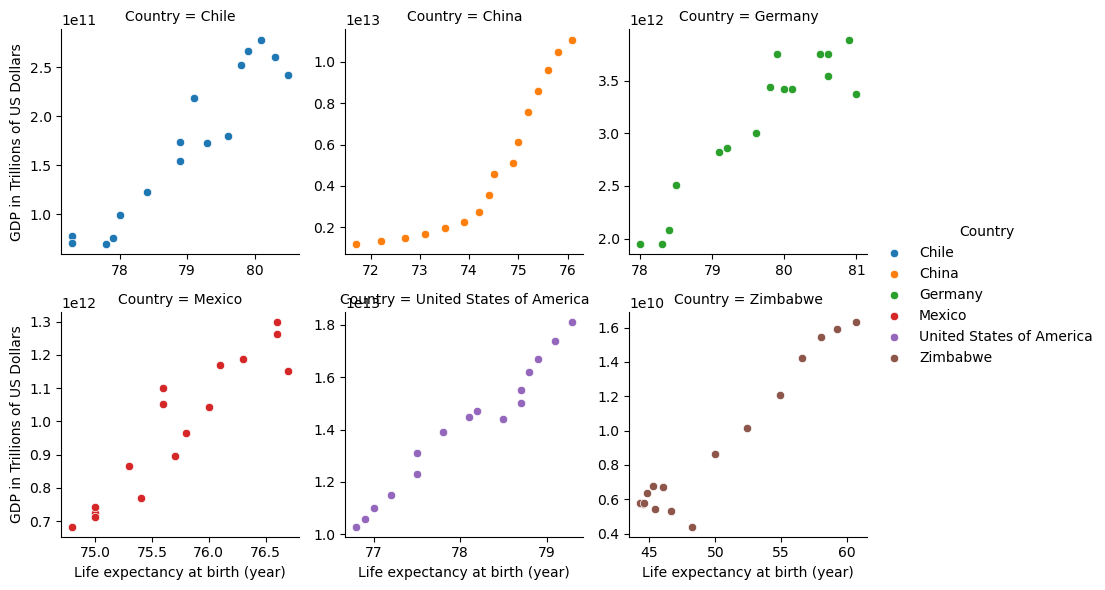

In [16]:
gGDPvLE = sns.FacetGrid(df, col='Country', col_wrap = 3, hue = 'Country', sharex = False, sharey = False) 
gGDPvLE.map(sns.scatterplot,'LE','GDP') 
gGDPvLE.add_legend() 
gGDPvLE.set_axis_labels("Life expectancy at birth (year)","GDP in Trillions of US Dollars") 
gGDPvLE;

# Conclusions

- Each country showed an increase in GDP with China having the largest growth.
- Each country showed an increase in life expectancy, especially Zimbabwe.
- The USA with the highest GDP average between the years 2000-2015 and Zimbabwe with the lowest.
- Germany has the highest life expectancy average (~80 years) between 2000-2015 and Zimbabwe with the lowest at ~50.
- There is a positive correlation between GDP and life expectancy for these six countries.